## Case Study EDA: Diabetes prediction

The following notebook performs EDA on a given dataset about patients in an attempt to understand the relationship between their characteristics and the likelihood of the diabetes in them.

Importing required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defining a color palette for binary hued plots:

In [2]:
biCol = ['maroon', 'thistle']

Reading the data from the .csv file into a pandas dataframe:

In [3]:
df = pd.read_csv('diabetes.csv')

Displaying the first and last five rows of the dataframe:

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Displaying the general information of the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Displaying the basic descriptive statistics of the dataframe:

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It can be seen that the minimum value in many columns is 0 which is not possible for those particular properties. These must be replaced with other values.
Checking the rows with 0 in any of the columns where 0 is not a possible value but has entered the dataset:

In [7]:
df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In the case of glucose, blood pressure and skin thickness, the mean and median values are not far off. Therefore, the 0s may be imputed with either of these. They are replaced with the mean.

In [8]:
df['Glucose'].replace(0, df['Glucose'].mean(), inplace = True)

In [9]:
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace = True)

In [10]:
df['SkinThickness'].replace(0, df['SkinThickness'].mean(), inplace = True)

In the case of insulin, the mean and the median are very far away and hence, the histogram is looked at before deciding which statistic to use to impute the zeroes.

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

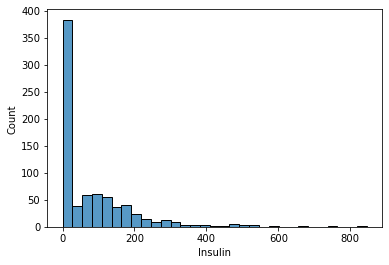

In [11]:
sns.histplot(data = df, x = 'Insulin')

Since the data is skewed, the median is used in order to reduce bias.

In [12]:
df['Insulin'].replace(0, df['Insulin'].median(), inplace = True)

In [13]:
df['BMI'].replace(0, df['BMI'].mean(), inplace = True)

The columns are once more checked for zeroes.

In [14]:
df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


The count of data points for each outcome is checked to understand if the dataset is balanced or not.

In [15]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


The number of non-diabetic people is much higher than the number of diabetic ones and hence, the dataset is imbalanced.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

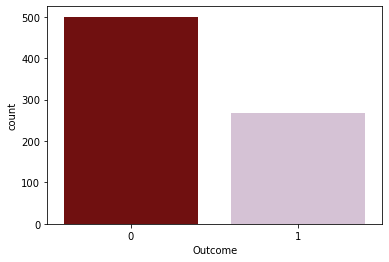

In [16]:
sns.countplot(x = 'Outcome', data = df, palette = biCol)

The pairplot is displayed to check for visual cues of correlated variables/features.

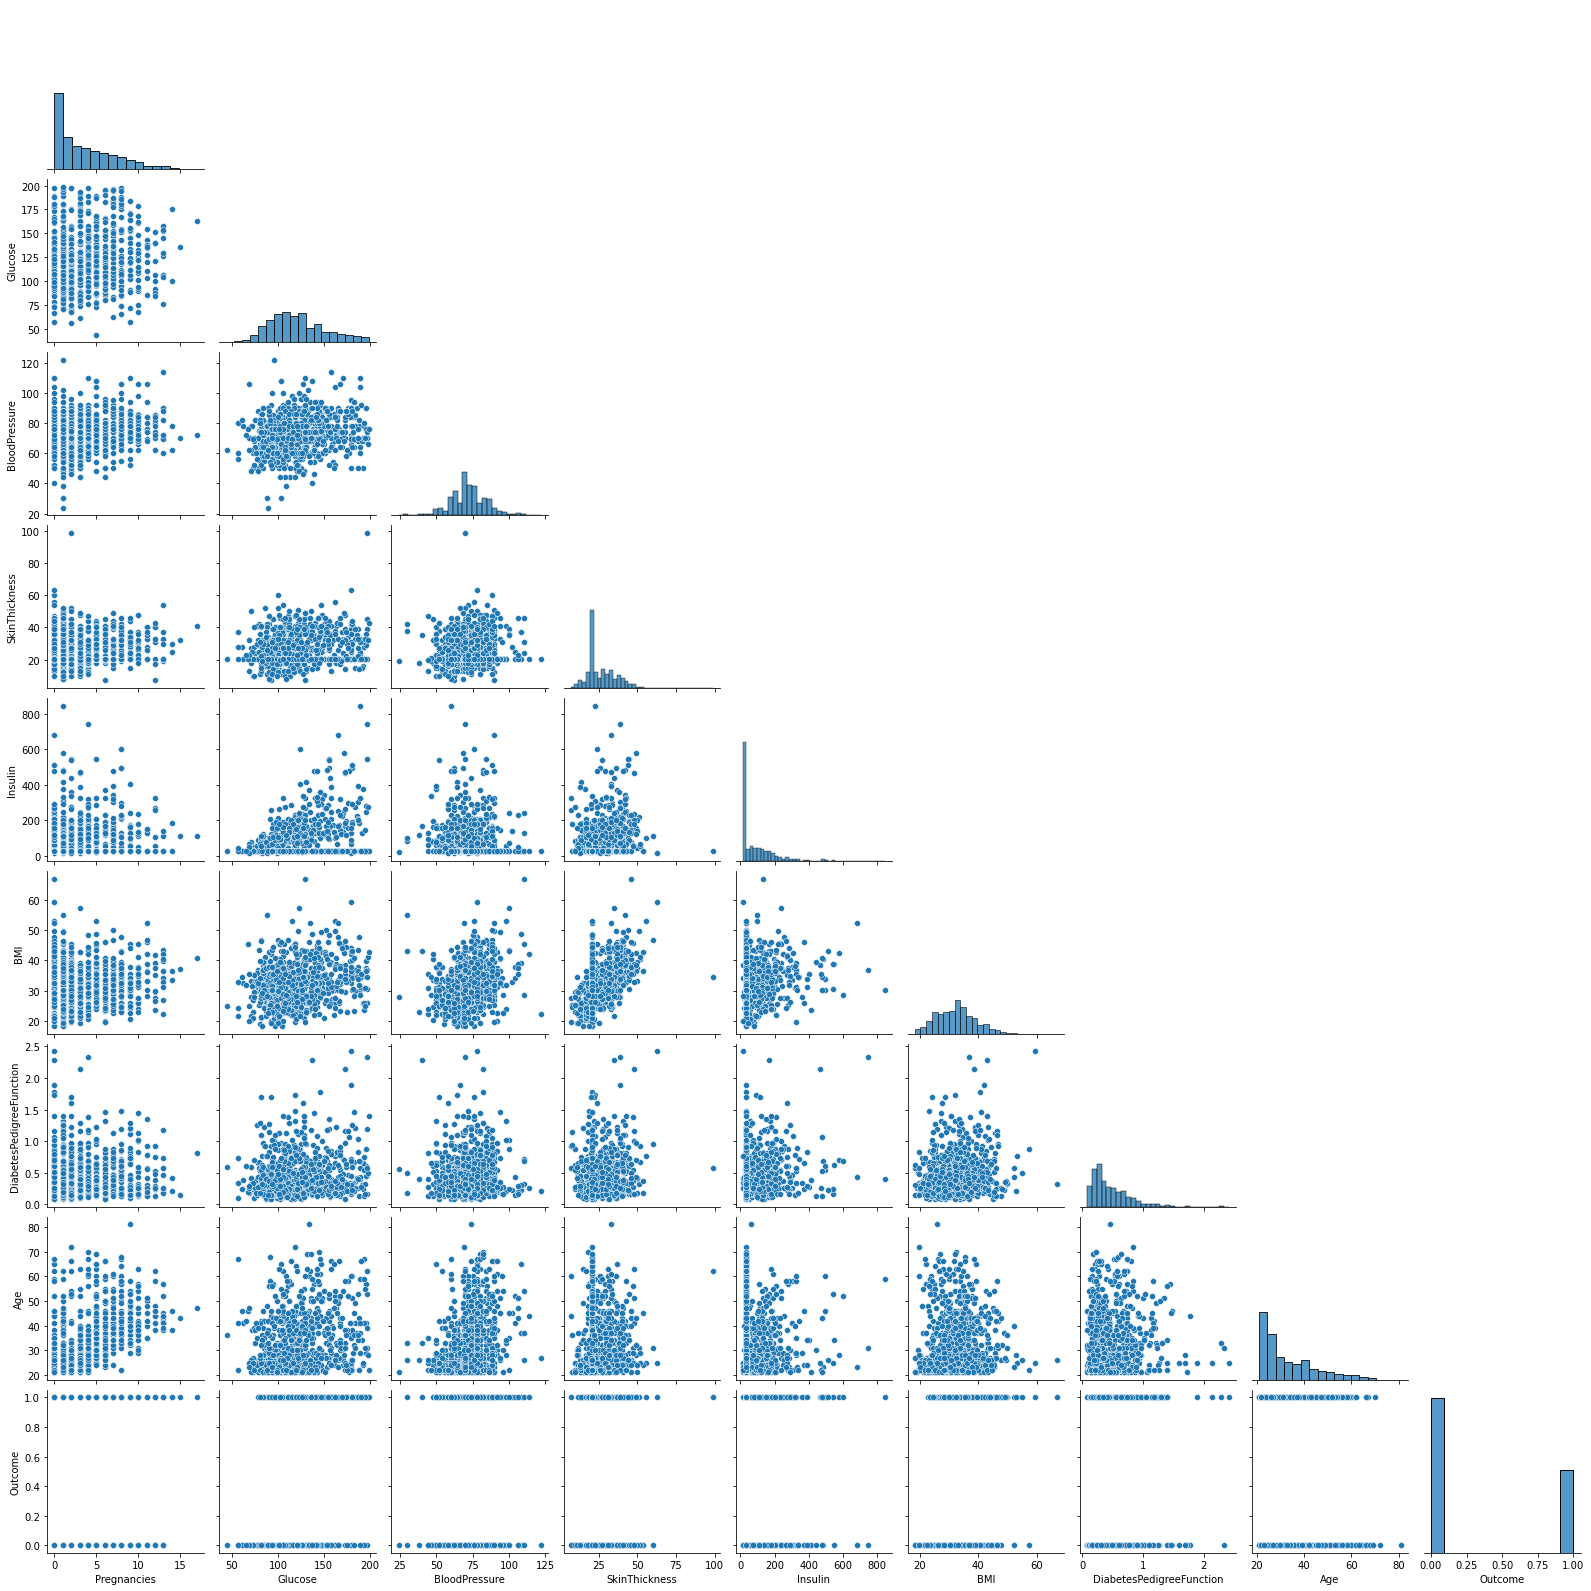

In [17]:
sns.pairplot(data = df, corner = True)

From the pairplots, it appears as if insulin and glucose are related. There also appears to be a relation between BMI and skin thickness.

The correlation heatmap is displayed to get a quantified sense of the same.

<AxesSubplot:>

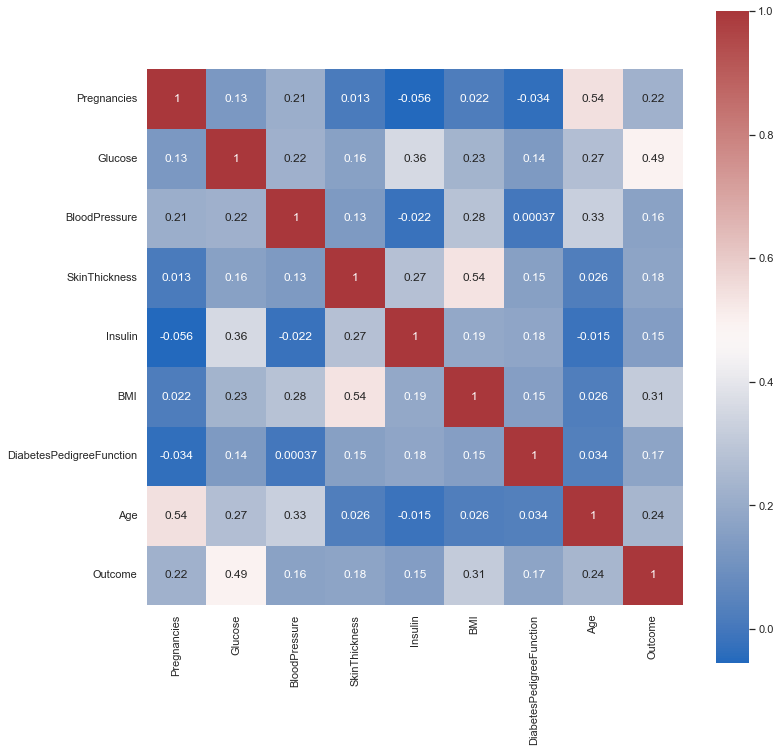

In [18]:
sns.set(rc = {'figure.figsize': (12, 12)})

corr = df.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True, cmap = 'vlag')

Although strong correlations don't exist between any two variables, BMI and skin thickness do seem to be related as expected from the pairplots. Age and pregnancies also seem to share a correlation.

Histplots are displayed to understand general correlations between a parameter and existence of the diabetic condition.

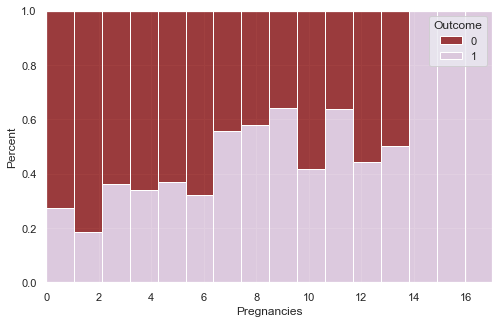

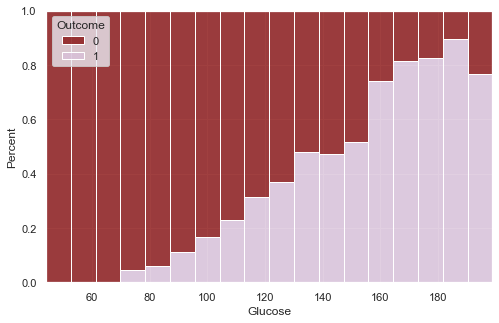

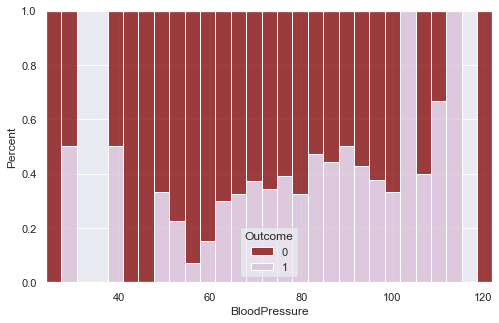

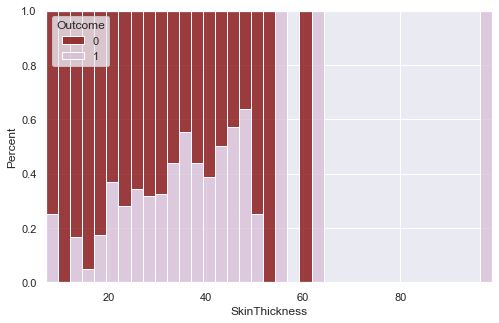

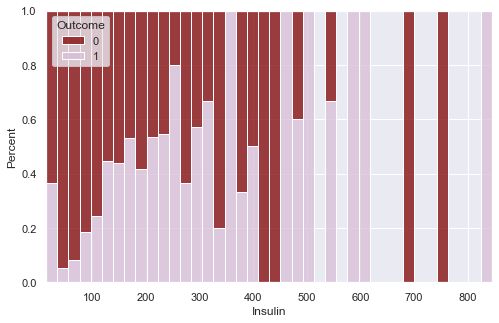

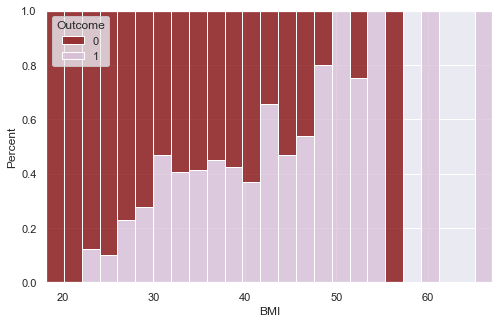

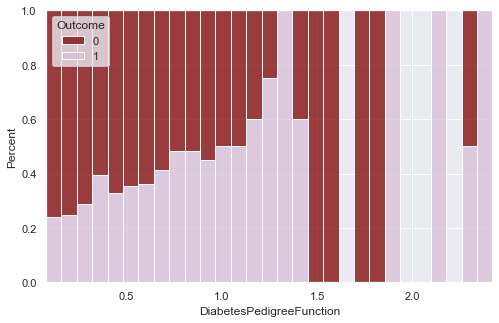

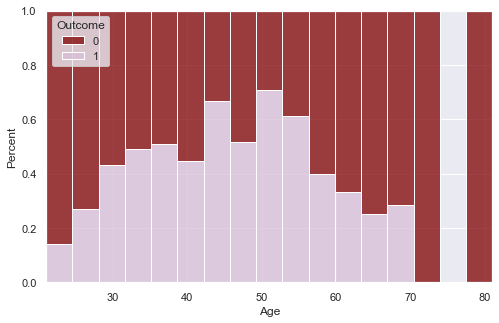

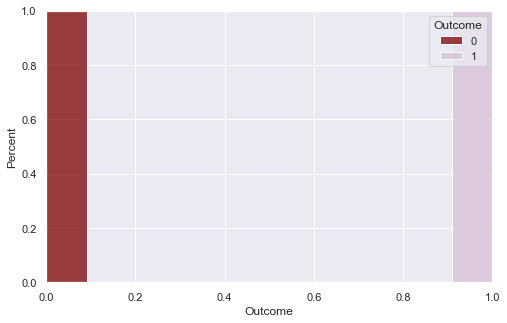

In [19]:
for column in df.columns:
    sns.set(rc = {'figure.figsize': (8, 5)})
    sns.histplot(df, x = column, hue = 'Outcome', multiple = 'fill', stat = 'percent', palette = biCol)
    plt.show()

Correlations are visible between parameters and the outcome.Higher pregnancies indicate a greater likelihood of diabetes. So do higher glucose levels, blood pressure, skin thickness, BMI, diabetes pedigree function. The relationship with insulin is not very clear.